<a id=top-page></a>
# Generate images for Fig. 1

***

In [1]:
import numpy as np
import cmcrameri.cm as cmc
import matplotlib.pyplot as plt
from pykitPIV import Particle, FlowField, Motion, Image, Postprocess

In [2]:
n_images = 2

In [3]:
image_size = (100,100)

In [4]:
size_buffer = 10

In [5]:
figsize = (6,3.5)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [6]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(2,4),
                     distances=(1,2),
                     densities=(0.2,0.26),
                     signal_to_noise=(5,20),
                     diameter_std=0.5,
                     seeding_mode='random', 
                     random_seed=100)

In [7]:
image = Image(random_seed=100)

In [8]:
image.add_particles(particles)

Particles added to the image.


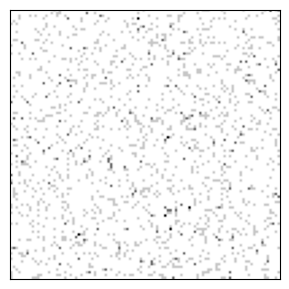

In [9]:
image.plot(0, 
           with_buffer=False,
           cmap='Greys',
           xticks=False,
           yticks=False,
           figsize=figsize, 
           filename='Particle.svg');

In [10]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

In [11]:
flowfield.generate_random_velocity_field(gaussian_filters=(10,11),
                                         n_gaussian_filter_iter=20,
                                         displacement=(0,10))

In [12]:
image.add_flowfield(flowfield)

Velocity field added to the image.


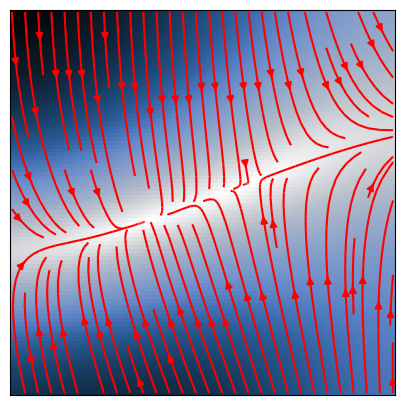

In [13]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    xticks=False,
                                    yticks=False,
                                    add_streamplot=True,
                                    streamplot_density=1,
                                    streamplot_color='r',
                                    cmap=cmc.oslo_r,
                                    cbar=False,
                                    figsize=(5,5),
                                    # filename='FlowField.svg');
                                    filename='Image_plot_velocity_field_magnitude.png');

<a id=add-movement></a>
***

## Add movement to particles

[Go to the top](#top-page)

In [14]:
motion = Motion(particles, 
                flowfield, 
                time_separation=1)

In [15]:
motion.forward_euler(n_steps=10)

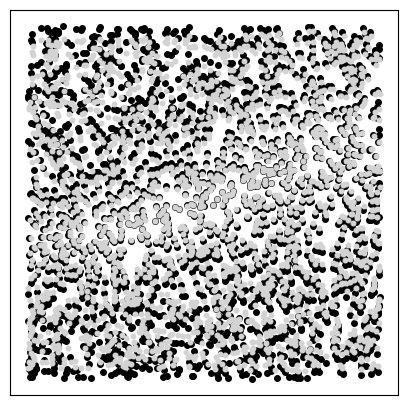

In [16]:
motion.plot_particle_motion(0,
                            s=16,
                            xticks=False,
                            yticks=False,
                            color_I2='#d3d3d3',
                            figsize=(5,5),
                            filename='Motion.svg');

<a id=add-movement-visualize></a>

#### Visualize the PIV image pair:

[Go to the top](#top-page)

In [17]:
image.add_motion(motion)

Particle movement added to the image.


In [18]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/20)

Reflected light added to images I1.
Reflected light added to images I2.


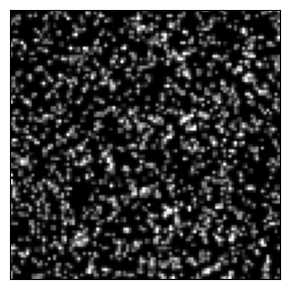

In [19]:
image.plot(0, 
           instance=1,
           with_buffer=False,
           xticks=False,
           yticks=False,
           cmap='Greys_r',
           figsize=figsize, 
           filename='Image-1.svg');

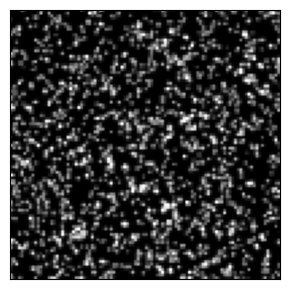

In [20]:
image.plot(0, 
           instance=2,
           with_buffer=False,
           xticks=False,
           yticks=False,
           cmap='Greys_r',
           figsize=figsize, 
           filename='Image-2.svg');

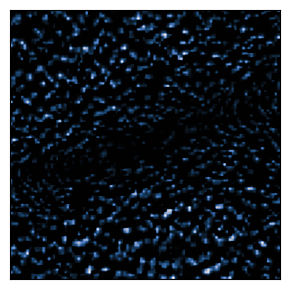

In [21]:
image.plot_image_pair(0,
                      with_buffer=False,
                      xticks=False,
                      yticks=False,
                      cmap=cmc.oslo,
                      figsize=figsize, 
                      filename='Image_plot_image_pair.png');

In [22]:
image.remove_buffers()

Buffers removed from images I1.
Buffers removed from images I2.
Buffers removed from the velocity field.


In [23]:
image_tensor = image.image_pairs_to_tensor()

In [24]:
image_tensor.shape

(2, 2, 100, 100)

In [25]:
postprocess = Postprocess(image_tensor)

In [26]:
postprocess.log_transform_images(addition=100)

In [27]:
postprocess.processed_image_tensor.shape

(2, 2, 100, 100)

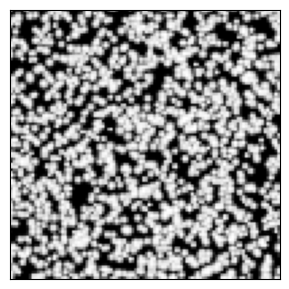

In [30]:
postprocess.plot(original=False,
                 idx=0,
                 xticks=False,
                 yticks=False,
                 cmap='Greys_r',
                 figsize=figsize, 
                 filename='Postprocess.svg');

***